# Loading Packages

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
df_all = pd.read_csv("all_projects.csv")

In [102]:
df_all = df_all.drop(columns=["project","init","end","project_url"])

In [103]:
X = df_all.drop(columns=["status"])
y = df_all["status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [105]:
X_train.shape

(269, 25)

For now we try removing "isuses missing"

In [106]:
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [107]:
print("Accuracy on training set: {:.3f}".format(random_forest_classifier.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(random_forest_classifier.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.882


In [108]:
print("Feature importances:") 
print(random_forest_classifier.feature_importances_)

Feature importances:
[0.05147544 0.06917167 0.02616732 0.16339709 0.03461255 0.02368763
 0.03162287 0.02175345 0.00830624 0.03101984 0.11641358 0.04593282
 0.02898395 0.02846041 0.04747288 0.09017289 0.0251201  0.02646332
 0.02577742 0.01288865 0.01697988 0.02481229 0.02758818 0.02171952
 0.        ]


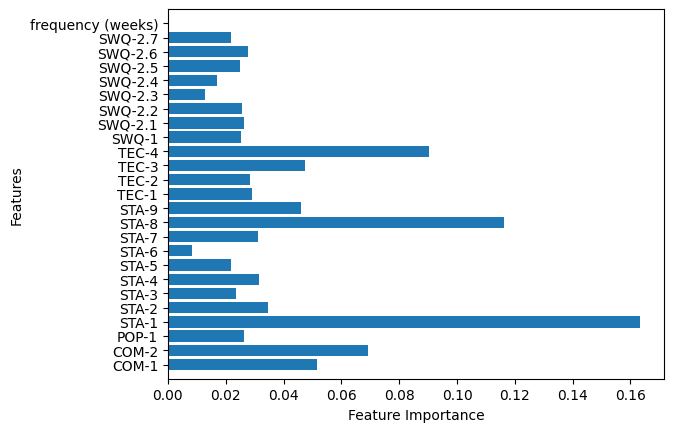

In [109]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns.tolist())
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

plot_feature_importances(random_forest_classifier)

In [110]:
from sklearn.metrics import confusion_matrix

In [111]:
pred_tree = random_forest_classifier.predict(X_test)

confusion = confusion_matrix(y_test, pred_tree)
print("counfusion matrix:\n", confusion)

counfusion matrix:
 [[57  1]
 [ 7  3]]


In [112]:
y_test.value_counts()

status
sustainable      58
unsustainable    10
Name: count, dtype: int64

In [113]:
from sklearn.metrics import ConfusionMatrixDisplay

<function matplotlib.pyplot.show(close=None, block=None)>

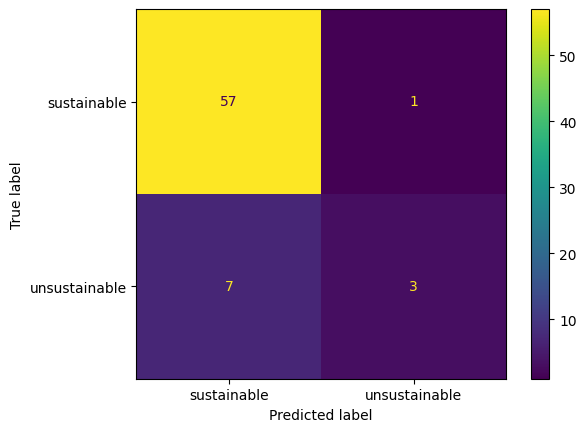

In [114]:
ConfusionMatrixDisplay.from_estimator(random_forest_classifier, X_test, y_test, display_labels=['sustainable', 'unsustainable'])
plt.show